# mor

In [1]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 6
最適な最小サンプル数: 2


,importance
Al2O3/SiO2,0.298481
H2O/SiO2,0.009770
NaOH/SiO2,0.143566
KOH/SiO2,0.483893
CsOH/SiO2,0.000000
temperature,0.005699
time,0.058591


,FALSE,mor
FALSE,326,2
mor,2,52


,FALSE,mor
FALSE,139,2
mor,2,21


正解率(Accuracy) : 訓練 0.9895287958115183, 検証 0.975609756097561
適合率(Precision) : 訓練 0.9629629629629629, 検証 0.9130434782608695
再現率(Recall) : 訓練 0.9629629629629629, 検証 0.9130434782608695
F1スコア : 訓練 0.9629629629629629, 検証 0.9130434782608695


In [2]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_mor_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_mor_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_mor_gs_Amorphous.pdf'

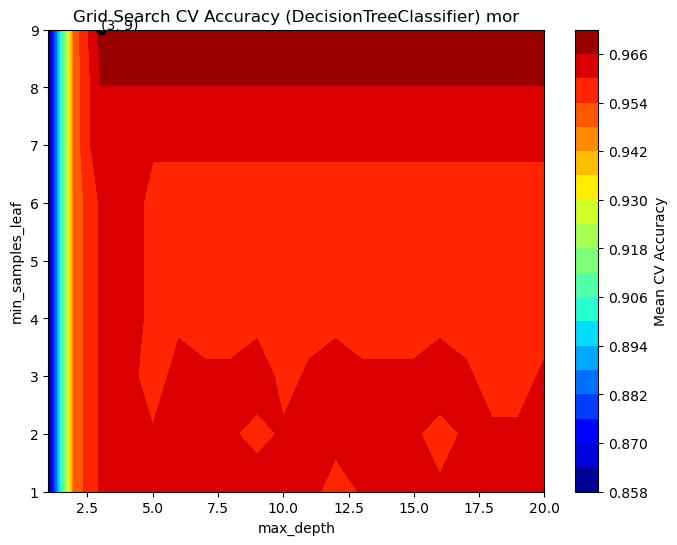

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) mor')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

In [7]:
x

,Al2O3/SiO2,H2O/SiO2,NaOH/SiO2,KOH/SiO2,CsOH/SiO2,temperature,time
sample,,,,,,,
試料1,0.876033,90.330579,0.000000,2.247934,0.0,180,72.0
試料2,0.250000,48.055556,2.777778,0.000000,0.0,65,168.0
試料3,0.937500,108.125000,6.250000,0.000000,0.0,100,168.0
試料4,0.324324,23.378378,1.351351,0.000000,0.0,100,168.0
試料5,0.032000,25.840000,0.400000,0.000000,0.0,175,72.0
...,...,...,...,...,...,...,...
試料542,0.100000,25.000000,0.150000,0.150000,0.0,150,144.0
試料543,0.090000,25.000000,0.000000,0.300000,0.0,150,144.0
試料544,0.090000,25.000000,0.075000,0.225000,0.0,150,144.0


# jbw

In [5]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 8
最適な最小サンプル数: 3


,importance
Al2O3/SiO2,0.094934
H2O/SiO2,0.207428
NaOH/SiO2,0.456369
KOH/SiO2,0.000000
CsOH/SiO2,0.000000
temperature,0.184111
time,0.057158


,FALSE,jbw
FALSE,364,2
jbw,1,15


,FALSE,jbw
FALSE,152,5
jbw,0,7


正解率(Accuracy) : 訓練 0.9921465968586387, 検証 0.9695121951219512
適合率(Precision) : 訓練 0.8823529411764706, 検証 0.5833333333333334
再現率(Recall) : 訓練 0.9375, 検証 1.0
F1スコア : 訓練 0.9090909090909091, 検証 0.7368421052631579


In [5]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_jbw_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_jbw_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_jbw_gs_Amorphous.pdf'

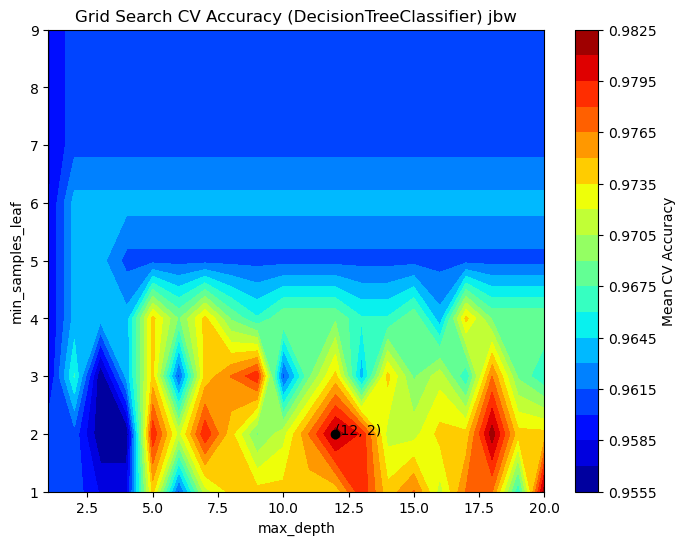

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) jbw')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# d6r

In [3]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 11
最適な最小サンプル数: 2


,importance
Al2O3/SiO2,0.131092
H2O/SiO2,0.189366
NaOH/SiO2,0.147709
KOH/SiO2,0.290886
CsOH/SiO2,0.000000
temperature,0.156284
time,0.084663


,FALSE,d6r
FALSE,252,4
d6r,16,110


,FALSE,d6r
FALSE,103,7
d6r,14,40


正解率(Accuracy) : 訓練 0.9476439790575916, 検証 0.8719512195121951
適合率(Precision) : 訓練 0.9649122807017544, 検証 0.851063829787234
再現率(Recall) : 訓練 0.873015873015873, 検証 0.7407407407407407
F1スコア : 訓練 0.9166666666666666, 検証 0.7920792079207921


In [8]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_d6r_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_d6r_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_d6r_gs_Amorphous.pdf'

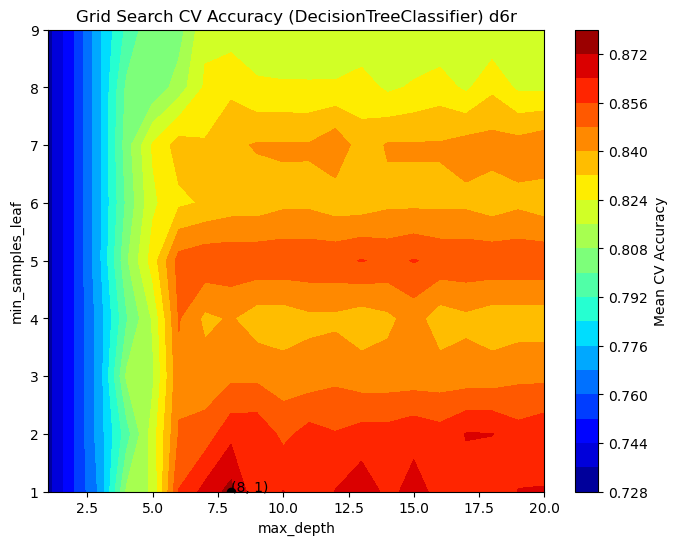

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) d6r')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# d8r

In [10]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 4
最適な最小サンプル数: 3


,importance
Al2O3/SiO2,0.265692
H2O/SiO2,0.000000
NaOH/SiO2,0.007754
KOH/SiO2,0.480491
CsOH/SiO2,0.167980
temperature,0.077555
time,0.000528


,d8r,false
d8r,37,6
false,3,337


,d8r,false
d8r,14,4
false,5,142


正解率(Accuracy) : 訓練 0.9765013054830287, 検証 0.9454545454545454
適合率(Precision) : 訓練 0.925, 検証 0.7368421052631579
再現率(Recall) : 訓練 0.8604651162790697, 検証 0.7777777777777778
F1スコア : 訓練 0.891566265060241, 検証 0.7567567567567568


In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_d8r_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_d8r_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_d8r_gs_Amorphous.pdf'

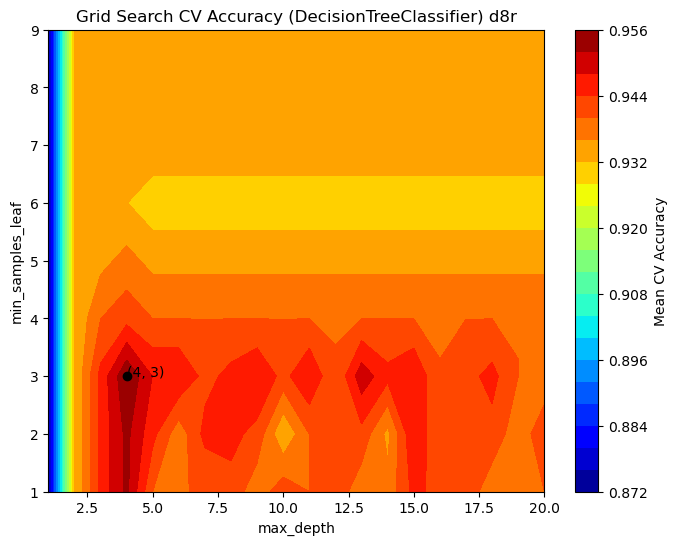

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) d8r')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# can

In [4]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 20
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.187671
H2O/SiO2,0.330835
NaOH/SiO2,0.015913
KOH/SiO2,0.125680
CsOH/SiO2,0.000000
temperature,0.140693
time,0.199208


,FALSE,can
FALSE,306,0
can,0,76


,FALSE,can
FALSE,124,7
can,4,29


正解率(Accuracy) : 訓練 1.0, 検証 0.9329268292682927
適合率(Precision) : 訓練 1.0, 検証 0.8055555555555556
再現率(Recall) : 訓練 1.0, 検証 0.8787878787878788
F1スコア : 訓練 1.0, 検証 0.8405797101449275


In [14]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_can_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_can_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_can_gs_Amorphous.pdf'

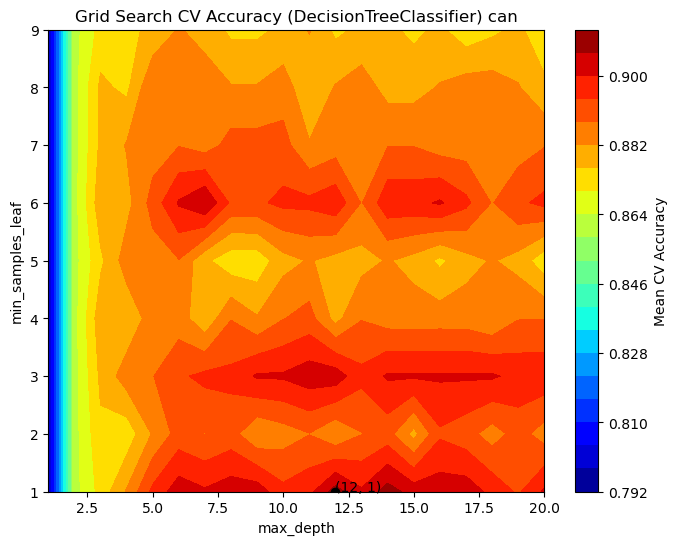

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) can')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# sod

In [5]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=6)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 6
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.072802
H2O/SiO2,0.068126
NaOH/SiO2,0.575860
KOH/SiO2,0.012695
CsOH/SiO2,0.000000
temperature,0.251937
time,0.018580


,FALSE,sod
FALSE,275,1
sod,2,104


,FALSE,sod
FALSE,110,9
sod,1,44


正解率(Accuracy) : 訓練 0.9921465968586387, 検証 0.9390243902439024
適合率(Precision) : 訓練 0.9904761904761905, 検証 0.8301886792452831
再現率(Recall) : 訓練 0.9811320754716981, 検証 0.9777777777777777
F1スコア : 訓練 0.985781990521327, 検証 0.8979591836734694


In [56]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_sod_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_sod_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_sod_gs_Amorphous.pdf'

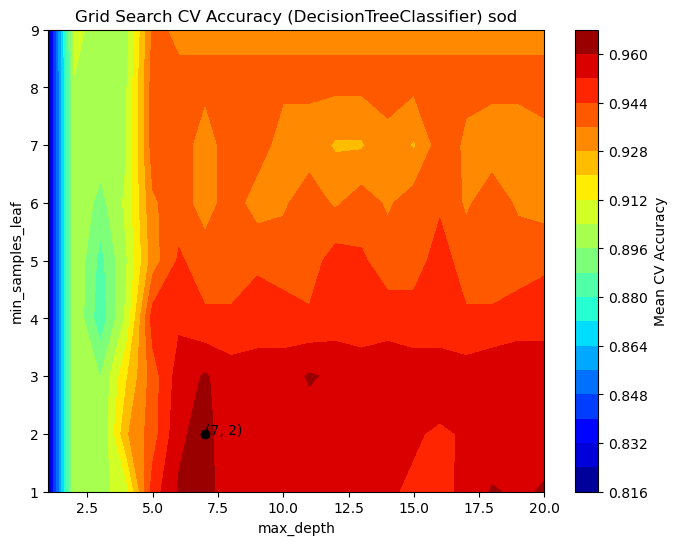

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) sod')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# lta

In [6]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 7
最適な最小サンプル数: 4


,importance
Al2O3/SiO2,0.194226
H2O/SiO2,0.167241
NaOH/SiO2,0.039684
KOH/SiO2,0.057163
CsOH/SiO2,0.209808
temperature,0.309838
time,0.022041


,FALSE,lta
FALSE,323,3
lta,8,48


,FALSE,lta
FALSE,137,3
lta,12,12


正解率(Accuracy) : 訓練 0.9712041884816754, 検証 0.9085365853658537
適合率(Precision) : 訓練 0.9411764705882353, 検証 0.8
再現率(Recall) : 訓練 0.8571428571428571, 検証 0.5
F1スコア : 訓練 0.897196261682243, 検証 0.6153846153846154


In [20]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_lta_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_lta_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_lta_gs_Amorphous.pdf'

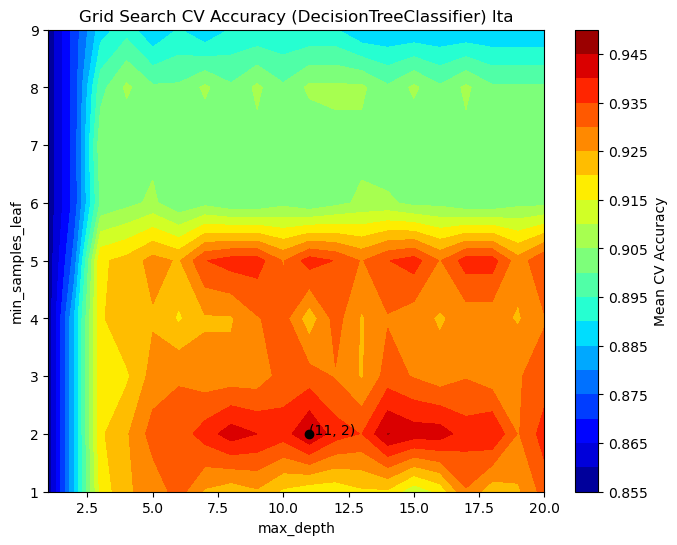

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) lta')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 4

In [22]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 13
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.200781
H2O/SiO2,0.101470
NaOH/SiO2,0.294788
KOH/SiO2,0.138464
CsOH/SiO2,0.000000
temperature,0.204983
time,0.059513


,4,false
4,220,0
false,2,161


,4,false
4,88,7
false,8,62


正解率(Accuracy) : 訓練 0.9947780678851175, 検証 0.9090909090909091
適合率(Precision) : 訓練 0.990990990990991, 検証 0.9166666666666666
再現率(Recall) : 訓練 1.0, 検証 0.9263157894736842
F1スコア : 訓練 0.995475113122172, 検証 0.9214659685863874


In [23]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_4_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_4_gs_Amorphous'
決定木.view()

'zeolite_lta_gs_Amorphous.pdf'

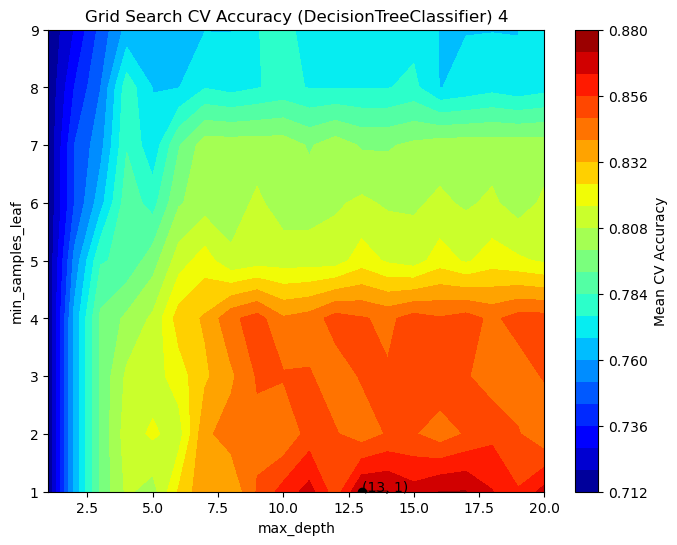

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 4')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 6

In [25]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 16
最適な最小サンプル数: 2


,importance
Al2O3/SiO2,0.132996
H2O/SiO2,0.125358
NaOH/SiO2,0.275089
KOH/SiO2,0.266044
CsOH/SiO2,0.000000
temperature,0.079121
time,0.121392


,6,false
6,213,1
false,21,148


,6,false
6,84,8
false,15,58


正解率(Accuracy) : 訓練 0.9425587467362925, 検証 0.8606060606060606
適合率(Precision) : 訓練 0.9102564102564102, 検証 0.8484848484848485
再現率(Recall) : 訓練 0.9953271028037384, 検証 0.9130434782608695
F1スコア : 訓練 0.9508928571428571, 検証 0.8795811518324608


In [26]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_6_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_6_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_6_gs_Amorphous.pdf'

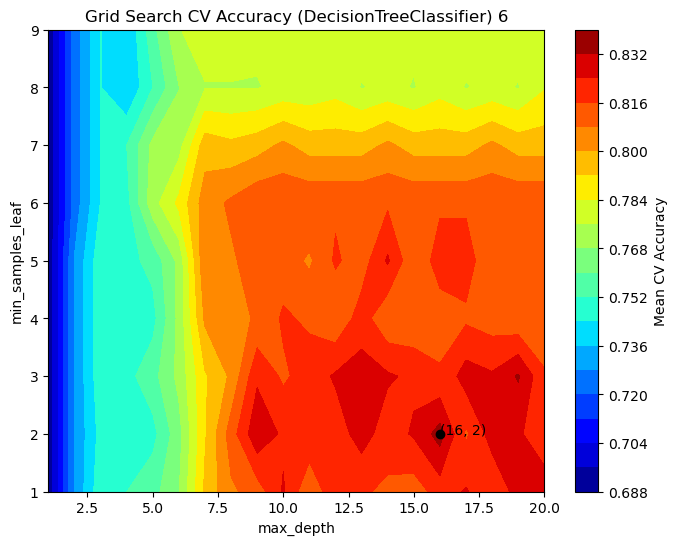

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 6')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 8

In [28]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="8")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="8")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="8")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="8")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="8")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="8")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 18
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.250538
H2O/SiO2,0.102918
NaOH/SiO2,0.093007
KOH/SiO2,0.228531
CsOH/SiO2,0.011265
temperature,0.165990
time,0.147751


,8,false
8,122,0
false,0,261


,8,false
8,38,15
false,16,96


正解率(Accuracy) : 訓練 1.0, 検証 0.8121212121212121
適合率(Precision) : 訓練 1.0, 検証 0.7037037037037037
再現率(Recall) : 訓練 1.0, 検証 0.7169811320754716
F1スコア : 訓練 1.0, 検証 0.7102803738317757


In [29]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_8_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_8_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_8_gs_Amorphous.pdf'

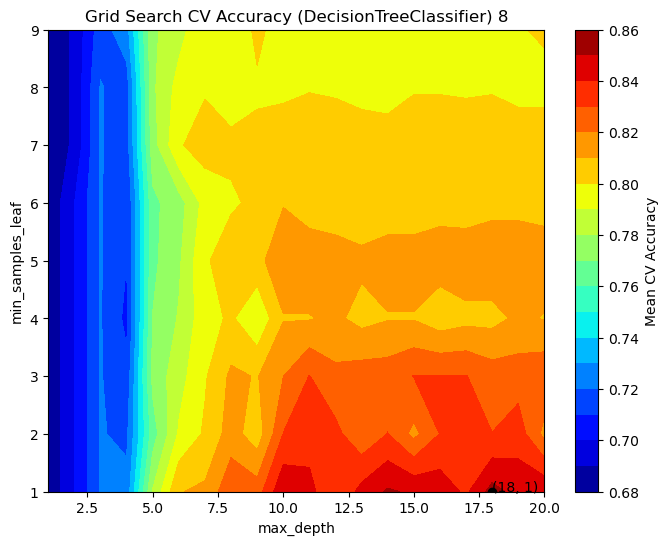

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 8')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 5-1

In [31]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="5-1")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="5-1")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="5-1")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="5-1")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="5-1")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="5-1")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 4
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.352794
H2O/SiO2,0.000000
NaOH/SiO2,0.205218
KOH/SiO2,0.355171
CsOH/SiO2,0.000000
temperature,0.018018
time,0.068798


,5-1,false
5-1,52,7
false,0,324


,5-1,false
5-1,21,4
false,2,138


正解率(Accuracy) : 訓練 0.9817232375979112, 検証 0.9636363636363636
適合率(Precision) : 訓練 1.0, 検証 0.9130434782608695
再現率(Recall) : 訓練 0.8813559322033898, 検証 0.84
F1スコア : 訓練 0.9369369369369369, 検証 0.875


In [32]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_5-1_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_5-1_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_5-1_gs_Amorphous.pdf'

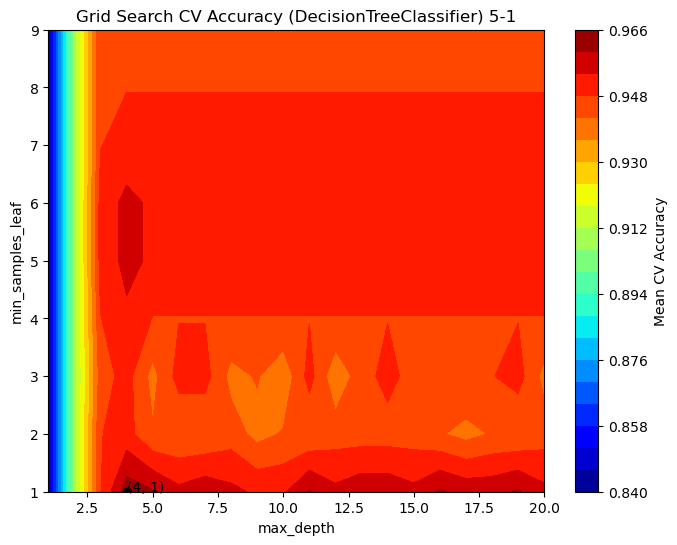

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 5-1')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 4-2

In [34]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 18
最適な最小サンプル数: 1


,importance
Al2O3/SiO2,0.168128
H2O/SiO2,0.217314
NaOH/SiO2,0.085623
KOH/SiO2,0.247108
CsOH/SiO2,0.037476
temperature,0.119461
time,0.124890


,4-2,false
4-2,127,0
false,3,253


,4-2,false
4-2,41,14
false,12,98


正解率(Accuracy) : 訓練 0.9921671018276762, 検証 0.8424242424242424
適合率(Precision) : 訓練 0.9769230769230769, 検証 0.7735849056603774
再現率(Recall) : 訓練 1.0, 検証 0.7454545454545455
F1スコア : 訓練 0.9883268482490273, 検証 0.7592592592592593


In [35]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_mor_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_mor_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_mor_gs_Amorphous.pdf'

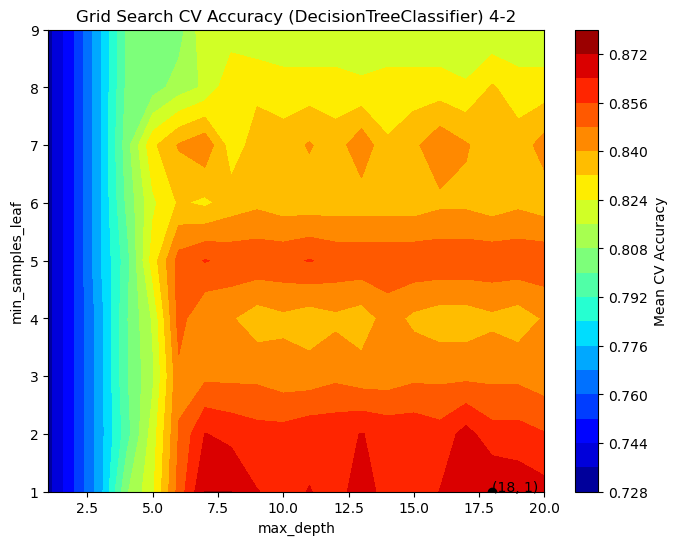

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 4-2')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()

# 6-2

In [37]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
from sklearn.tree import DecisionTreeClassifier
import numpy as np
max_depths=np.arange(1, 21, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeClassifier()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=fold)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeClassifier(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適な深さ: 13
最適な最小サンプル数: 3


,importance
Al2O3/SiO2,0.233174
H2O/SiO2,0.080735
NaOH/SiO2,0.182124
KOH/SiO2,0.271248
CsOH/SiO2,0.000000
temperature,0.157878
time,0.074841


,6-2,false
6-2,97,11
false,10,265


,6-2,false
6-2,37,9
false,16,103


正解率(Accuracy) : 訓練 0.9451697127937336, 検証 0.8484848484848485
適合率(Precision) : 訓練 0.9065420560747663, 検証 0.6981132075471698
再現率(Recall) : 訓練 0.8981481481481481, 検証 0.8043478260869565
F1スコア : 訓練 0.9023255813953488, 検証 0.7474747474747475


In [38]:
from sklearn.tree import export_graphviz
from graphviz import Source
with open('zeolite_6-2_gs_Amorphous', 'w') as f:
    export_graphviz(model, out_file=f, feature_names=x.columns, class_names=model.classes_)
dot_file_path='zeolite_6-2_gs_Amorphous'
決定木=Source.from_file(dot_file_path)
決定木.view()

'zeolite_6-2_gs_Amorphous.pdf'

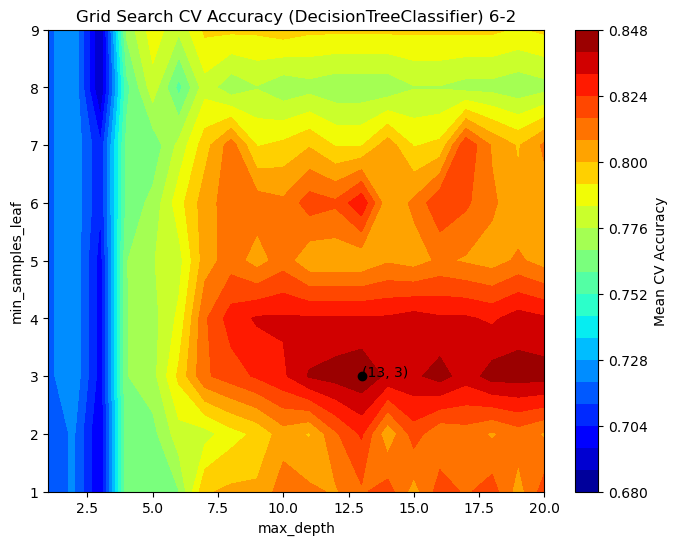

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチ結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_depth = results['param_max_depth'].astype(int)
param_leaf = results['param_min_samples_leaf'].astype(int)
scores = results['mean_test_score'].values

# ユニークなパラメータ値
depth_values = sorted(np.unique(param_depth))
leaf_values = sorted(np.unique(param_leaf))

# スコアマトリクスを初期化
score_matrix = np.zeros((len(leaf_values), len(depth_values)))

# スコアをマトリクスに詰める
for i, leaf in enumerate(leaf_values):
    for j, depth in enumerate(depth_values):
        match = (param_depth == depth) & (param_leaf == leaf)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(depth_values, leaf_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.title('Grid Search CV Accuracy (DecisionTreeClassifier) 6-2')

# ベストパラメータの印
best_depth = gs_cv.best_params_['max_depth']
best_leaf = gs_cv.best_params_['min_samples_leaf']
plt.scatter(best_depth, best_leaf, color='black', marker='o')
plt.text(best_depth, best_leaf, f'({best_depth}, {best_leaf})', color='black')
plt.show()